In [12]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

from PIL import Image
import os, glob

In [13]:
import os

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel0042/aiffel/rock_scissor_paper/scissor
가위 이미지 resize 완료!


In [14]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel0042/aiffel/rock_scissor_paper/rock
바위 이미지 resize 완료!


In [15]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel0042/aiffel/rock_scissor_paper/paper
보 이미지 resize 완료!


In [16]:
def load_data(img_path, number_of_data):
    # 가위 : 0, 바위 : 1, 보 : 2
    #number_of_data=5778   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path, 5778)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 5778 입니다.
x_train shape: (5778, 28, 28, 3)
y_train shape: (5778,)


라벨:  0


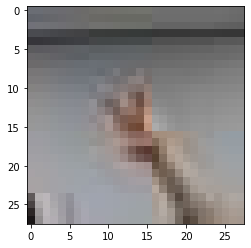

In [17]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [18]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu',input_shape=(28,28,3)))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
# model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

In [19]:
# model=keras.models.Sequential()
# model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
# model.add(keras.layers.MaxPool2D(2,2))
# model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
# model.add(keras.layers.MaxPooling2D((2,2)))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(32, activation='relu'))
# model.add(keras.layers.Dense(64, activation='relu'))
# model.add(keras.layers.Dense(3, activation='softmax'))

In [20]:
x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

After Reshape - x_train_reshaped shape: (5778, 28, 28, 3)
Epoch 1/10
181/181 [==============================] - 1s 6ms/step - loss: 1.0364 - accuracy: 0.4384
Epoch 2/10
181/181 [==============================] - 1s 5ms/step - loss: 0.5889 - accuracy: 0.7657
Epoch 3/10
181/181 [==============================] - 1s 5ms/step - loss: 0.3277 - accuracy: 0.8854
Epoch 4/10
181/181 [==============================] - 1s 5ms/step - loss: 0.2163 - accuracy: 0.9233
Epoch 5/10
181/181 [==============================] - 1s 5ms/step - loss: 0.1474 - accuracy: 0.9486
Epoch 6/10
181/181 [==============================] - 1s 5ms/step - loss: 0.1091 - accuracy: 0.9659
Epoch 7/10
181/181 [==============================] - 1s 5ms/step - loss: 0.0611 - accuracy: 0.9808
Epoch 8/10
181/181 [==============================] - 1s 5ms/step - loss: 0.0510 - accuracy: 0.9841
Epoch 9/10
181/181 [==============================] - 1s 5ms/step - loss: 0.0314 - accuracy: 0.9922
Epoch 10/10
181/181 [=====================

In [21]:
image_dir_path_test = os.getenv("HOME") +  "/aiffel/rock_scissor_paper/test"
(x_test, y_test) = load_data(image_dir_path_test, 150)
x_test_norm = x_test / 255.0  # 입력은 0~1 사이의 값으로 정규화

학습데이터(x_train)의 이미지 개수는 150 입니다.


In [22]:
# 훈련시킨 model을 사용하여 test_accuracy를 측정

x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)  

test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

5/5 - 0s - loss: 3.5136 - accuracy: 0.4200
test_loss: 3.513587236404419 
test_accuracy: 0.41999998688697815
